In [ ]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import keras 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

##Load Dataset

In [12]:
train_data = "/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Train"
valid_data = "/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Validation"
test_data = "/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test"

##Data Agumentation

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# m=0
# dir_path = "/content/drive/MyDrive/Datasets/New Masks Dataset/Train/Non Mask"
# for j in os.listdir(dir_path):
  
#   img = image.load_img(dir_path+'//'+j)
#   x = img_to_array(img)
#   x = x.reshape((1,) + x.shape)
#   m+=1

#   i = 0
#   print(m)

#   for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Train/Non Mask', save_prefix='mask', save_format='jpeg'):
#     i += 1
#     if i > 10:
#         break  # otherwise the generator would loop indefinitely






# # img = load_img('/content/drive/MyDrive/Datasets/Human_horse/horse-or-human/train/horses')  # this is a PIL image
# # x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# # x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # # the .flow() command below generates batches of randomly transformed images
# # # and saves the results to the `preview/` directory
# # i = 0
# # for batch in datagen.flow(x, batch_size=1,
# #                           save_to_dir='/content/drive/MyDrive/Colab Notebooks/Projects', save_prefix='hourse', save_format='jpeg'):
# #     i += 1
# #     if i > 20:
# #         break  # otherwise the generator would loop indefinitely

In [14]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters

training_data_gen = ImageDataGenerator(
                      rescale = 1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')


# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_dataset = training_data_gen.flow_from_directory(train_data,
                                                         target_size=(200,200),
                                                         batch_size = 128,
                                                         class_mode = 'binary'
                                                         )

Found 5622 images belonging to 2 classes.


In [15]:
training_dataset.class_indices

{'Mask': 0, 'Non Mask': 1}

In [16]:
# this is the augmentation configuration we will use for validation:
# only rescaling

valid_data_gen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
validation_dataset = valid_data_gen.flow_from_directory(valid_data,
                                                        target_size = (200,200),
                                                        batch_size =128,
                                                        class_mode = 'binary')



Found 1069 images belonging to 2 classes.


In [17]:
#Save best model using best validation accuracy

model_path = "/content/drive/MyDrive/Models/live_mask_detection.h5"
checkpoint = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')
callback_list = [checkpoint]


In [18]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 

In [19]:
# compile cnn model
cnn_model.compile(optimizer=Adam(lr = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
# train cnn model
history = cnn_model.fit(training_dataset, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= validation_dataset,
                          callbacks=callback_list)

Epoch 1/50
44/44 [==============================] - 98s 2s/step - loss: 0.6374 - accuracy: 0.6348 - val_loss: 0.6066 - val_accuracy: 0.7858

Epoch 00001: val_accuracy improved from -inf to 0.78578, saving model to /content/drive/MyDrive/Models/live_mask_detection.h5
Epoch 2/50
44/44 [==============================] - 92s 2s/step - loss: 0.4847 - accuracy: 0.8040 - val_loss: 0.4098 - val_accuracy: 0.8120

Epoch 00002: val_accuracy improved from 0.78578 to 0.81197, saving model to /content/drive/MyDrive/Models/live_mask_detection.h5
Epoch 3/50
44/44 [==============================] - 92s 2s/step - loss: 0.4126 - accuracy: 0.8176 - val_loss: 0.3197 - val_accuracy: 0.8587

Epoch 00003: val_accuracy improved from 0.81197 to 0.85875, saving model to /content/drive/MyDrive/Models/live_mask_detection.h5
Epoch 4/50
44/44 [==============================] - 92s 2s/step - loss: 0.3767 - accuracy: 0.8417 - val_loss: 0.4673 - val_accuracy: 0.7830

Epoch 00004: val_accuracy did not improve from 0.858

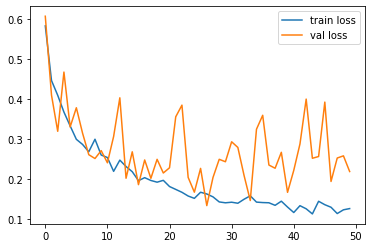

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

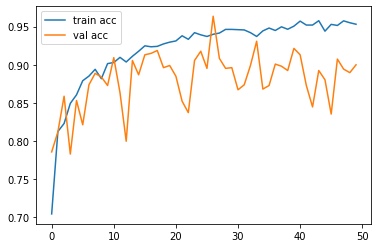

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
#Save best model using best validation accuracy

model_path = "/content/drive/MyDrive/Models/Mask_detection_new_model.h5"
checkpoints = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')
callback_lists = [checkpoints]


In [24]:
## 2nd Model 
#Building cnn model
cnn_model2 = keras.models.Sequential([
                                     keras.layers.Conv2D(filters =32, kernel_size= 5, input_shape=[200,200,3]),
                                     keras.layers.MaxPooling2D(pool_size=(4,4)),

                                     keras.layers.Conv2D(filters=64, kernel_size =4),
                                     keras.layers.MaxPooling2D(pool_size=(4,4)),

                                     keras.layers.Conv2D(filters=128,kernel_size =3),
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),

                                     keras.layers.Conv2D(filters=256,kernel_size =2),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    #  keras.layers.Conv2D(filters=512,kernel_size =3),
                                    #  keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.25),
                                     keras.layers.Flatten(),

                                     keras.layers.Dense(units=128,activation='relu'),
                                     keras.layers.Dropout(0.1),

                                     keras.layers.Dense(units=256,activation='relu'),
                                     keras.layers.Dropout(0.20),

                                     keras.layers.Dense(units=256,activation='relu'),
                                     keras.layers.Dropout(0.25),

                                     keras.layers.Dense(units=2 , activation='softmax') # output layer                                     
                                     ])




In [25]:
# compile cnn model
cnn_model2.compile(optimizer=Adam(lr = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
# train cnn model
history2 = cnn_model2.fit(training_dataset, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= validation_dataset,
                          callbacks=callback_lists)

Epoch 1/50
44/44 [==============================] - 93s 2s/step - loss: 0.6446 - accuracy: 0.6070 - val_loss: 0.3827 - val_accuracy: 0.8391

Epoch 00001: val_accuracy improved from -inf to 0.83910, saving model to /content/drive/MyDrive/Models/Mask_detection_new_model.h5
Epoch 2/50
44/44 [==============================] - 91s 2s/step - loss: 0.4155 - accuracy: 0.8281 - val_loss: 0.3424 - val_accuracy: 0.8634

Epoch 00002: val_accuracy improved from 0.83910 to 0.86342, saving model to /content/drive/MyDrive/Models/Mask_detection_new_model.h5
Epoch 3/50
44/44 [==============================] - 91s 2s/step - loss: 0.3217 - accuracy: 0.8703 - val_loss: 0.2756 - val_accuracy: 0.8756

Epoch 00003: val_accuracy improved from 0.86342 to 0.87558, saving model to /content/drive/MyDrive/Models/Mask_detection_new_model.h5
Epoch 4/50
44/44 [==============================] - 91s 2s/step - loss: 0.2777 - accuracy: 0.8883 - val_loss: 0.3006 - val_accuracy: 0.8943

Epoch 00004: val_accuracy improved fr

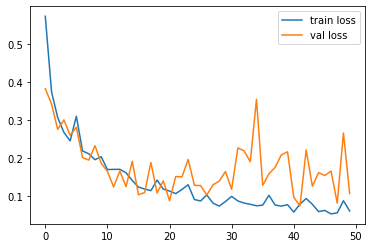

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

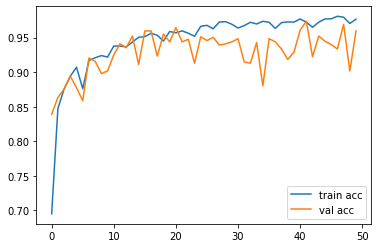

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the accuracy
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
##Model Import
from keras.preprocessing import image

In [29]:
model1_path = "/content/drive/MyDrive/Models/live_mask_detection.h5"
model2_path = "/content/drive/MyDrive/Models/Mask_detection_new_model.h5"

In [30]:
model1 = keras.models.load_model(model1_path)
model2 = keras.models.load_model(model2_path)

In [31]:
def pred_mask(model,mask_nonmask):
  test_image = image.load_img(mask_nonmask,target_size=(200,200))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image,axis=0)

  result=model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result,"------->>>>",pred)

  if pred==0:
    print("Predictes -->>Mask")
  else:
    print("Predicted---->>>With out mask")
    

In [32]:
import os

In [33]:
dir_path = "/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask"
test_list =[]
for i in os.listdir(dir_path):
  img =dir_path+'/'+i
  test_list.append(img)

print(test_list)
  

['/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1843.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1802.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1874.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1828.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1773.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1731.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1845.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1702.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1779.jpeg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1803.jpg', '/content/drive/MyDrive/Datasets/DATA AGUMENTATION/Mask_Detection/Test/Mask/1721.jpg', '/content/drive/MyDrive/Datasets/DATA AGU

In [ ]:
for data in test_list:
  pred_mask(model1,data)

In [ ]:
for data in test_list:
  pred_mask(model2,data)

[[0.999 0.001]] ------->>>> 0
Predictes -->>Mask
[[0.999 0.001]] ------->>>> 0
Predictes -->>Mask
[[0.997 0.003]] ------->>>> 0
Predictes -->>Mask
[[0.996 0.004]] ------->>>> 0
Predictes -->>Mask
[[0.999 0.001]] ------->>>> 0
Predictes -->>Mask
[[0.885 0.115]] ------->>>> 0
Predictes -->>Mask
[[0.996 0.004]] ------->>>> 0
Predictes -->>Mask
[[0.99 0.01]] ------->>>> 0
Predictes -->>Mask
[[0.894 0.106]] ------->>>> 0
Predictes -->>Mask
[[0.999 0.001]] ------->>>> 0
Predictes -->>Mask
[[0.11 0.89]] ------->>>> 1
Predicted---->>>With out mask
[[0.984 0.016]] ------->>>> 0
Predictes -->>Mask
[[1. 0.]] ------->>>> 0
Predictes -->>Mask
[[0.307 0.693]] ------->>>> 1
Predicted---->>>With out mask
[[0.965 0.035]] ------->>>> 0
Predictes -->>Mask
[[0.953 0.047]] ------->>>> 0
Predictes -->>Mask
[[1. 0.]] ------->>>> 0
Predictes -->>Mask
[[1. 0.]] ------->>>> 0
Predictes -->>Mask
[[0.994 0.006]] ------->>>> 0
Predictes -->>Mask
[[0.619 0.381]] ------->>>> 0
Predictes -->>Mask
[[0.995 0.005]] ----

In [ ]:
dir_path = "/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask"
test_list =[]
for i in os.listdir(dir_path):
  img =dir_path+'/'+i
  test_list.append(img)

print(test_list)
  

['/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01077.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01060.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01045.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01048.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01036.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01065.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01070.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01042.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01069.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01066.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01037.jpg', '/content/drive/MyDrive/Datasets/New Masks Dataset/Test/Non Mask/real_01049.jpg', '/content/drive

In [ ]:
for data in test_list:
  pred_mask(model1,data)

[[0.035 0.965]] ------->>>> 1
Predicted---->>>With out mask
[[0.005 0.995]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.067 0.933]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.025 0.975]] ------->>>> 1
Predicted---->>>With out mask
[[0.008 0.992]] ------->>>> 1
Predicted---->>>With out mask
[[0.103 0.897]] ------->>>> 1
Predicted---->>>With out mask
[[0.07 0.93]] ------->>>> 1
Predicted---->>>With out mask
[[0.005 0.995]] ------->>>> 1
Predicted---->>>With out mask
[[0.001 0.999]] ------->>>> 1
Predicted---->>>With out mask
[[0.003 0.997]] ------->>>> 1
Predicted---->>>With out mask
[[0.31 0.69]] ------->>>> 1
Predicted---->>>With out mask
[[0.014 0.986]] ------->>>> 1
Predicted---->>>With out mask
[[0.074 0.926]] ------->>>> 1
Predicted---->>>With out mask
[[0.026 0.974]] ------->>>> 1
Predicted---->>>With out mask
[[0.008 0.992]] ------->>>> 1
Predicted---->>>With out m

In [ ]:
for data in test_list:
  pred_mask(model2,data)

[[0.296 0.704]] ------->>>> 1
Predicted---->>>With out mask
[[0.002 0.998]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.001 0.999]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.01 0.99]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.001 0.999]] ------->>>> 1
Predicted---->>>With out mask
[[0.002 0.998]] ------->>>> 1
Predicted---->>>With out mask
[[0.005 0.995]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.009 0.991]] ------->>>> 1
Predicted---->>>With out mask
[[0.001 0.999]] ------->>>> 1
Predicted---->>>With out mask
[[0. 1.]] ------->>>> 1
Predicted---->>>With out mask
[[0.004 0.996]] ------->>>> 1
